In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

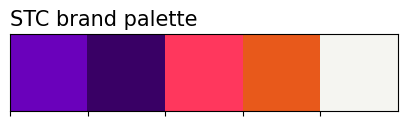

In [2]:
# Palette
import seaborn as sns
sns.palplot(['#6A01BB', '#390065', '#FF375D','#e8591b','#f5f5f1' ])

plt.title("STC brand palette ",loc='left',fontsize=15,y=1)
plt.show()

In [3]:
data = pd.read_excel('C:\\Users\\اسما مجدي\\Downloads\\projects\\STC TV\\task 1\\stc TV Data Set_T1.xlsb')


data.to_csv('stc TV Data Set_T1.csv', index=False)

data.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [4]:
data['series_title'] = data['series_title'].astype(str)  
filtered_df = data[data['series_title'].str.contains('1')]
program_names = filtered_df['program_name'].tolist()
print(np.unique(program_names))

['2 Fil-Isaaf  (T) ' '24   ' '24 Carat  (T) ' '24: Live Another Day '
 'A-Shaqiqatan   ' 'Active hooter: America Under Fire   '
 'Afrah Al Qibba   ' 'Agents of .H.I.E.L.D.   ' 'Akoon Aw La  (T) '
 "Al Akhwa A'adaa  (T) " 'Al Bayt Al Kabeer   ' 'Al Hala G   '
 'Al Kabous  (T) ' 'American Horror tory  ' 'American Horror tory   '
 'American Odyssey   ' 'Anger Management   ' 'Aquarius   (T) '
 'Ash vs Evil Dead   ' 'Ash-Shak  (T) ' 'Atlanta   ' 'Banat Adam  (T) '
 'Banat okkar Nabat  (T) ' 'Bates Motel   ' 'Bayn Al Kanayen  (T) '
 'Black ails   ' 'Black-ish  (T) ' 'Blackish   '
 'Blaze And The Monster Machines   ' 'Bloodline   ' 'Blunt Talk   '
 'Britannia   ' 'Bubble Guppies   ' 'Caramel  (T) ' 'Chello  (T) '
 'Community  (T) ' 'Criminal Minds   ' 'Dalaa Banat  (T) ' 'Damages   '
 'Devious Maids   ' 'Dexter   ' 'Dinofroz  (T) '
 'Dora And Friends: Into The City   ' 'Dora The Explorer   '
 'Dora the Explorer   ' 'Driver Dan’s tory Train  (T) ' 'Empire   '
 'Extant  (T) ' 'Ezai E-Sehha   ' 

In [5]:
columns_to_drop = ['Column1','program_desc','series_title'] 
data = data.drop(columns_to_drop, axis=1)


1. Create a backup of the dataset before starting any analysis

In [6]:
df= data.copy()

In [7]:
df.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_genre', 'hd',
       'original_name'],
      dtype='object')

In [8]:
df.dtypes

date_                int64
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_genre       object
hd                   int64
original_name       object
dtype: object

In [9]:
# check for nulls
df.isna().sum()

date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_genre       0
hd                  0
original_name       0
dtype: int64

In [10]:
# check for duplicated
print('Number of Duplicate Records: {}'.format(df.duplicated().sum()))
df = df.drop_duplicates() 

Number of Duplicate Records: 102383


In [11]:
df = df.rename(columns={'date_': 'date','user_id_maped':'user_id'})

In [12]:
df['date'] = pd.to_datetime(df['date'], origin='1899-12-30', unit='D')

In [13]:
df['program_genre'].unique()

array(['Drama', 'Animation', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Crime', 'Family',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

In [14]:
df.program_genre = df.program_genre.replace('SERIES_NOT_ADDED_UNDER_ANY_GENRE', "Others")
df.program_genre = df.program_genre.replace('NOT_DEFINED_IN_UMS', "Others")
df.program_class = df.program_class.replace('SERIES/EPISODES', "SERIES")

In [15]:
df['duration_hours'] = df['duration_seconds'] / 3600
df.drop('duration_seconds', axis=1)

,date,user_id,program_name,program_class,season,episode,program_genre,hd,original_name,duration_hours
0,2017-05-27,26138,100 treets,MOVIE,0,0,Drama,0,100 treets,0.011111
1,2017-05-21,7946,Moana,MOVIE,0,0,Animation,1,Moana,0.004722
2,2017-08-10,7418,The Mermaid Princess,MOVIE,0,0,Animation,1,The Mermaid Princess,0.002222
3,2017-07-26,19307,The Mermaid Princess,MOVIE,0,0,Animation,1,The Mermaid Princess,0.021111
4,2017-07-07,15860,Churchill,MOVIE,0,0,Biography,1,Churchill,0.024167
...,...,...,...,...,...,...,...,...,...,...
1048570,2017-04-22,23716,Extraterrestrial,MOVIE,0,0,Horror,0,Extraterrestrial,1.351389
1048571,2017-11-29,1776,Friends The One With The Holiday Armadillo,SERIES,7,10,Comedy,0,Friends,0.350278
1048572,2017-06-15,1918,Masters of Horror Dreams In The Witch House,SERIES,1,2,Horror,0,Masters of Horror,0.001667
1048573,2017-09-11,25737,Two Lovers and a Bear,MOVIE,0,0,Drama,1,Two Lovers and a Bear,0.020000


In [16]:
number_of_users = df['user_id'].nunique()
number_of_users

11578

In [17]:
df.loc[df['program_class'] == 'SERIES', 'program_name'] = df['program_name']+'_SE'+df['season'].astype(str)+'_EP'+df['episode'].astype(str)

In [18]:
df['views'] = df['user_id'].groupby(df['program_name']).transform('count')
df

,date,user_id,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_hours,views
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,100 treets,0.011111,45
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,1,Moana,0.004722,6075
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,1,The Mermaid Princess,0.002222,4649
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,1,The Mermaid Princess,0.021111,4649
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,1,Churchill,0.024167,614
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017-04-22,23716,Extraterrestrial,4865,MOVIE,0,0,Horror,0,Extraterrestrial,1.351389,651
1048571,2017-11-29,1776,Friends The One With The Holiday Armadillo...,1261,SERIES,7,10,Comedy,0,Friends,0.350278,102
1048572,2017-06-15,1918,Masters of Horror Dreams In The Witch House_S...,6,SERIES,1,2,Horror,0,Masters of Horror,0.001667,113
1048573,2017-09-11,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama,1,Two Lovers and a Bear,0.020000,147


2. Identify Most Viewed Movies/Shows:

Determine the most watched movies or series episodes by analyzing the following metrics:

.Total views
.Number of users
.Total watch time

In [20]:
#Calculate metrics
total_views = df.groupby('program_name')['views'].sum().reset_index()
unique_users = df.groupby('program_name')['user_id'].nunique().reset_index()
total_watch_time = df.groupby('program_name')['duration_hours'].sum().reset_index()

3. Select Top 10

In [21]:
def top(df):
   #Calculate metrics
   total_views = df.groupby('program_name')['views'].sum().reset_index()
   unique_users = df.groupby('program_name')['user_id'].nunique().reset_index()
   total_watch_time = df.groupby('program_name')['duration_hours'].sum().reset_index()

   summary = df.groupby('program_name').agg({
      'views': 'sum',
      'duration_hours': 'sum',
      'user_id': 'nunique'
   }).reset_index()

   #Merge results
   summary = total_views.merge(unique_users, on='program_name').merge(total_watch_time, on='program_name')
   summary.columns = ['program_name', 'total_views', 'unique_users', 'total_watch_time (h)']

   #sort and select top 10
   top_10 = summary.sort_values(by=['total_views'], ascending=False).head(10)

   return top_10

top_10=top(df)

In [22]:
top_10

,program_name,total_views,unique_users,total_watch_time (h)
9858,The Boss Baby,217120225,3348,2667.030000
10868,Trolls,80622441,2584,1380.025000
7085,Moana,36905625,2112,1510.426111
10131,The Mermaid Princess,21613201,2065,410.633333
1658,Baywatch,17707264,2030,477.728611
9724,The Adventures of Petey and Friends,17272336,1679,199.368056
8607,Rings,12545764,1656,298.858889
5677,Inside,10413529,1586,220.075278
10055,The Jetsons & WWE: Robo-WrestleMania!,10131489,1546,144.090556
9320,Surf's Up : WaveMania,9150625,1477,300.040833


4. Study user experience in relation to the category of the program (movie, series).

In [23]:
type_ratio = round(df.program_class.value_counts(normalize=True).to_frame().transpose(),2)
type_ratio

program_class,SERIES,MOVIE
proportion,0.59,0.41


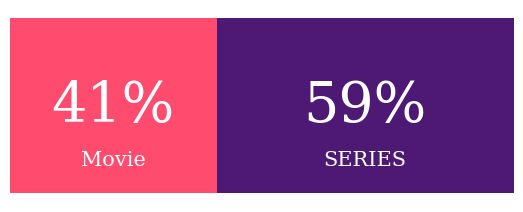

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(type_ratio.index, type_ratio['MOVIE'], 
        color='#ff375e', alpha=0.9)
ax.barh(type_ratio.index, type_ratio['SERIES'], left=type_ratio['MOVIE'], 
        color='#390065', alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in type_ratio.index:
    ax.annotate(f"{int(type_ratio['MOVIE'][i]*100)}%", 
                   xy=(type_ratio['MOVIE'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(type_ratio['MOVIE'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in type_ratio.index:
    ax.annotate(f"{int(type_ratio['SERIES'][i]*100)}%", 
                   xy=(type_ratio['MOVIE'][i]+type_ratio['SERIES'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("SERIES", 
                   xy=(type_ratio['MOVIE'][i]+type_ratio['SERIES'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()

In [25]:
category_analysis = df.groupby('program_class').agg({
    'user_id': 'nunique',         
    'views': 'sum',               
    'duration_hours': 'mean',     
    'program_name': 'count'       
}).reset_index()

# Rename columns for clarity
category_analysis.columns = ['Program Class', 'Unique Users', 'Total Views',  'Avg Duration (h)', 'Number of Programs']
category_analysis

,Program Class,Unique Users,Total Views,Avg Duration (h),Number of Programs
0,MOVIE,11355,696706832,0.257878,392212
1,SERIES,3901,145588050,0.457834,553980


5. Plot Viewing Time vs. User Count.

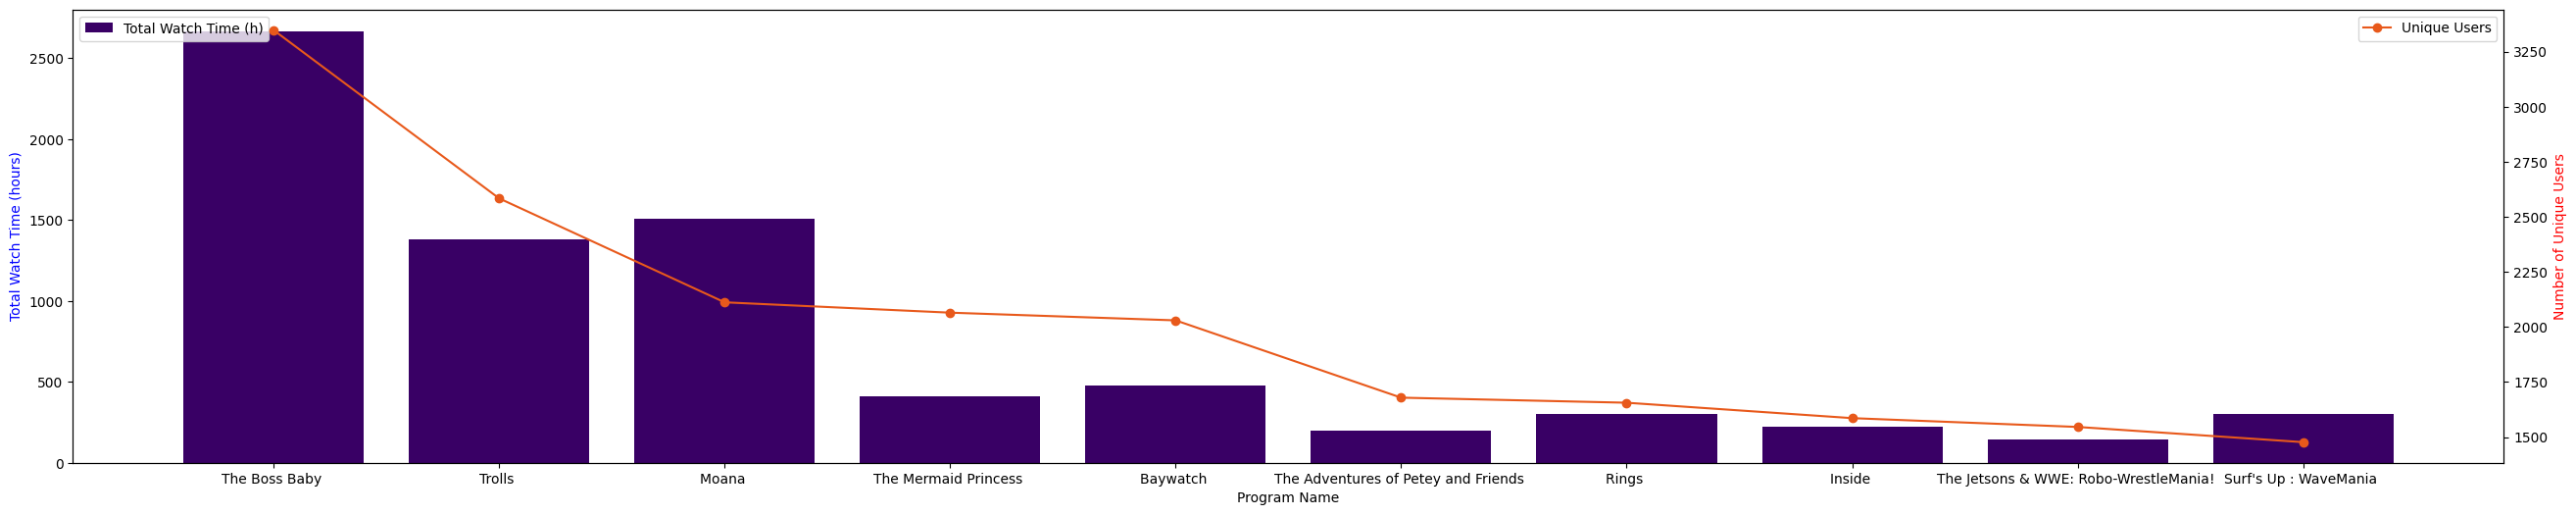

In [26]:
fig, ax1 = plt.subplots(figsize=(32, 6))

ax1.bar(top_10['program_name'], top_10['total_watch_time (h)'], color='#390065', label='Total Watch Time (h)')

# Create another y-axis for the unique users
ax2 = ax1.twinx()

# Line plot for Unique Users
ax2.plot(top_10['program_name'], top_10['unique_users'], color='#e8591b', marker='o', linestyle='-', label='Unique Users')

# Setting the x-axis label
ax1.set_xlabel('Program Name')

# Setting the y-axis label on the left side for Watch Time
ax1.set_ylabel('Total Watch Time (hours)', color='b')

# Setting the y-axis label on the right side for Unique Users
ax2.set_ylabel('Number of Unique Users', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

6. Examine user viewing patterns in different resolutions (HD, SD).

In [27]:
df['program_id'] = df.groupby(['original_name']).ngroup()

In [33]:
df_movies = df[df['program_class'] == 'MOVIE'].copy()
df_series = df[df['program_class'] == 'SERIES'].copy()

In [39]:
#Number of HD in the Catlog
hd_size_movie = df_movies[['hd', 'program_id']]
hd_size_movie = hd_size_movie.groupby(by="hd", as_index=False)['program_id'].count()
hd_size_movie['hd'] = np.where(hd_size_movie['hd'] == 1, 'HD', 'SD')

In [41]:
#Number of HD in the Catlog
hd_size_s = df_series[['hd', 'program_id']]
hd_size_s = hd_size_s.groupby(by="hd", as_index=False)['program_id'].count()
hd_size_s['hd'] = np.where(hd_size_s['hd'] == 1, 'HD', 'SD')

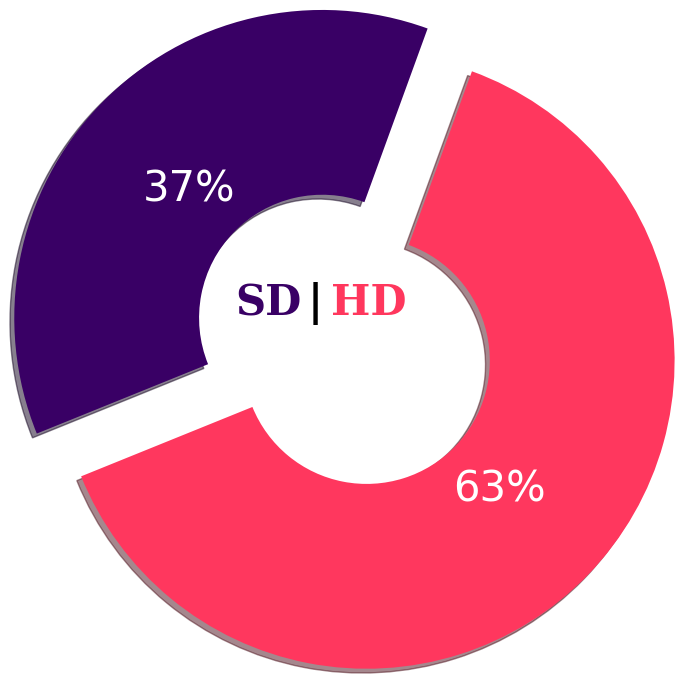

In [42]:
# create variables for data and labels and colors
pie_data = hd_size_movie.loc[:,'program_id']
pie_labels = hd_size_movie.loc[:,'hd']
pie_color=['#390065','#ff375e'] 

# Make figure and axes
fig, ax = plt.subplots(1,1, figsize=(12, 5),)

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = ax.pie(pie_data, 
                                     colors=pie_color,
                                     textprops={'size': 30, 'color': 'white'},
                                     autopct='%.0f%%',
                                     shadow=True, 
                                     radius=2,
                                     startangle=70, # change the angle to make small on the right side
                                     wedgeprops=dict(width=1.2), # create donut chart
                                     explode=(0,0.4) # make the small standout
                                    )


fig.text(0.44,0.5,"SD", fontweight="bold", fontfamily='serif', fontsize=30, color='#390065')
fig.text(0.5,0.5,"|", fontweight="bold", fontfamily='serif', fontsize=30, color='black')
fig.text(0.52,0.5,"HD", fontweight="bold", fontfamily='serif', fontsize=30, color='#FF375D')

plt.show()

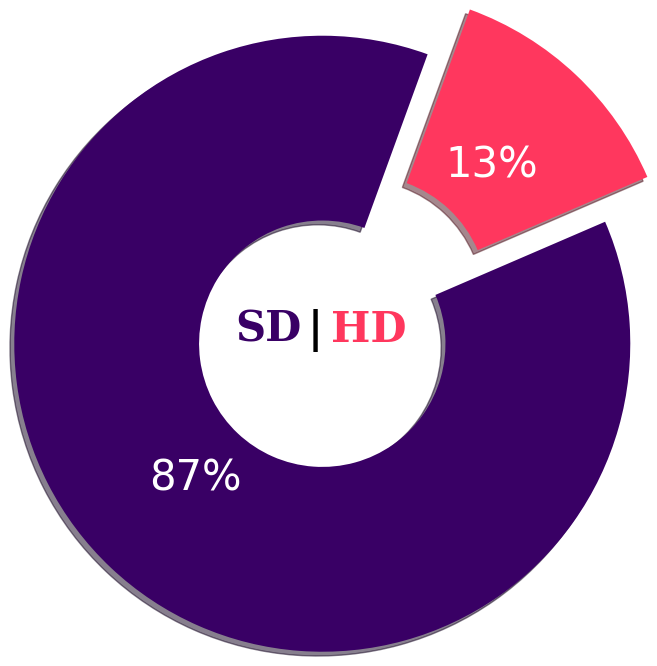

In [43]:
# create variables for data and labels and colors
pie_data = hd_size_s.loc[:,'program_id']
pie_labels = hd_size_s.loc[:,'hd']
pie_color=['#390065','#ff375e'] 

# Make figure and axes
fig, ax = plt.subplots(1,1, figsize=(12, 5),)

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = ax.pie(pie_data, 
                                     colors=pie_color,
                                     textprops={'size': 30, 'color': 'white'},
                                     autopct='%.0f%%',
                                     shadow=True, 
                                     radius=2,
                                     startangle=70, # change the angle to make small on the right side
                                     wedgeprops=dict(width=1.2), # create donut chart
                                     explode=(0,0.4) # make the small standout
                                    )


fig.text(0.44,0.5,"SD", fontweight="bold", fontfamily='serif', fontsize=30, color='#390065')
fig.text(0.5,0.5,"|", fontweight="bold", fontfamily='serif', fontsize=30, color='black')
fig.text(0.52,0.5,"HD", fontweight="bold", fontfamily='serif', fontsize=30, color='#FF375D')

plt.show()